In [10]:
import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("../input/churn-modelling/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8599,8600,15708713,Hill,633,France,Male,35,3,0.00,2,1,1,36249.76,0
4345,4346,15584536,Barber,720,Germany,Male,46,3,97042.60,1,1,1,133516.51,1
9948,9949,15735078,Onwughara,724,Germany,Female,53,1,139687.66,2,1,1,12913.92,0
5387,5388,15624072,Kiernan,669,Spain,Male,22,10,0.00,2,1,0,176163.74,0
3127,3128,15721007,Charlton,776,Germany,Male,33,8,115130.34,1,0,0,129525.50,1


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# eda 

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

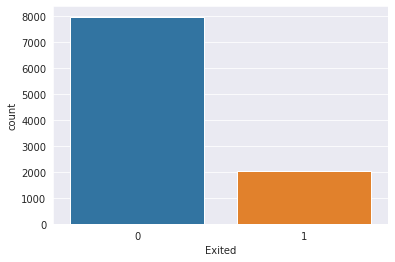

In [8]:
sns.countplot(data = df, x = "Exited")
plt.show()

Looks like 20% of the customers have churned and 80% haven't

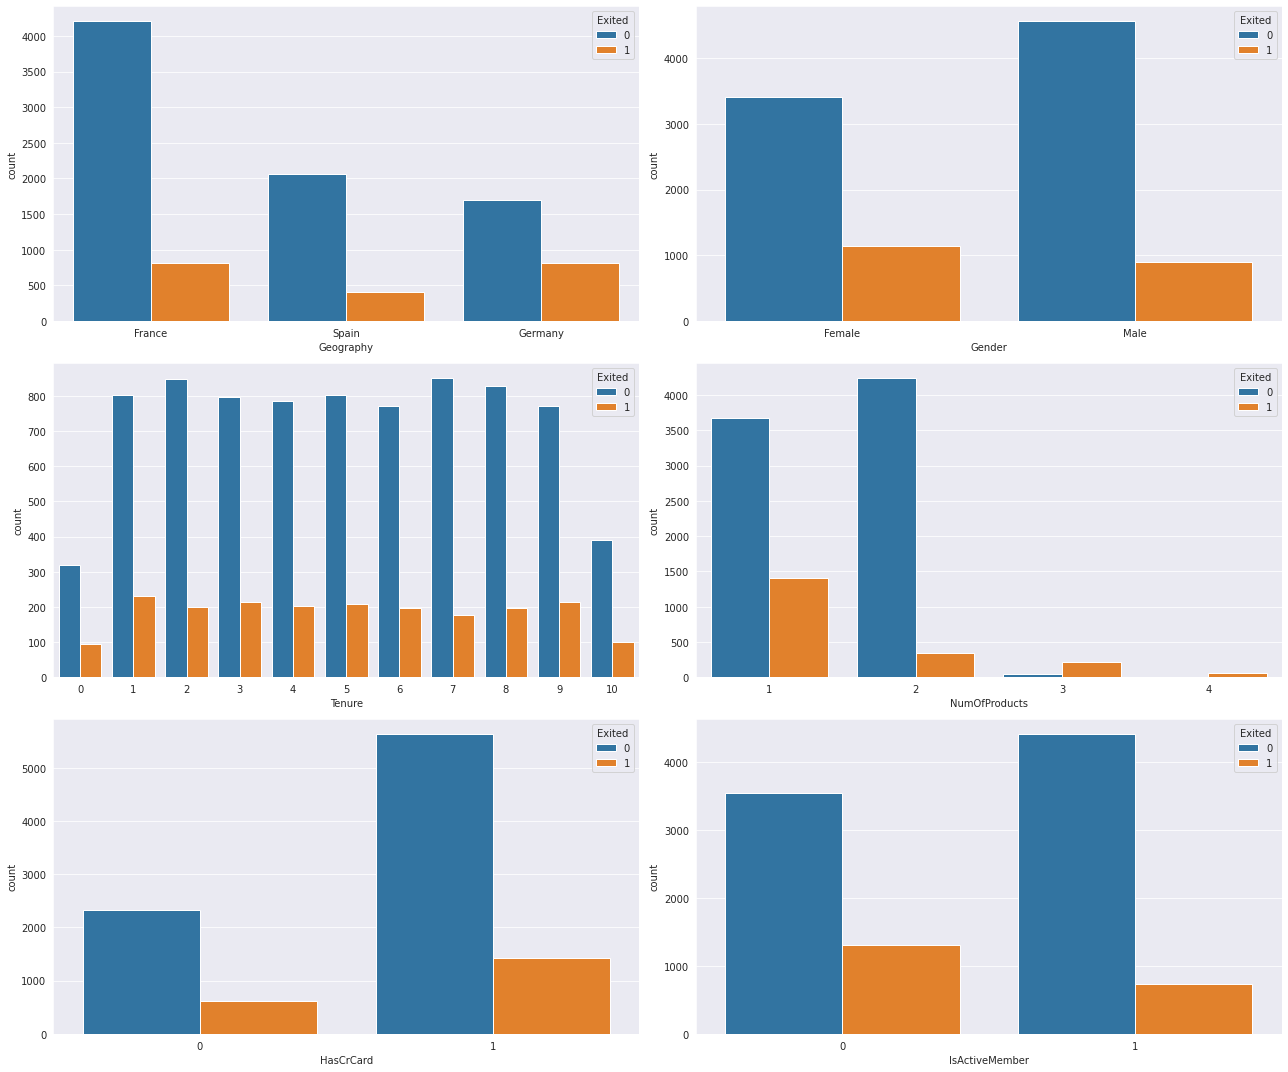

In [11]:
# visualizing categorical variables 

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1])
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = df, ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1])

plt.tight_layout()
plt.show()

From the above plots we can conclude that: 

<li>Majority of the customers are from france but more customers have churned from Germany</li>
<li>The proportion of female customers churning is also greater than that of male customers </li>
<li>The majority of the people who churned are not an active member</li>
<li>Many people have products from 0 ~ 1, only a handful have more than 1</li>


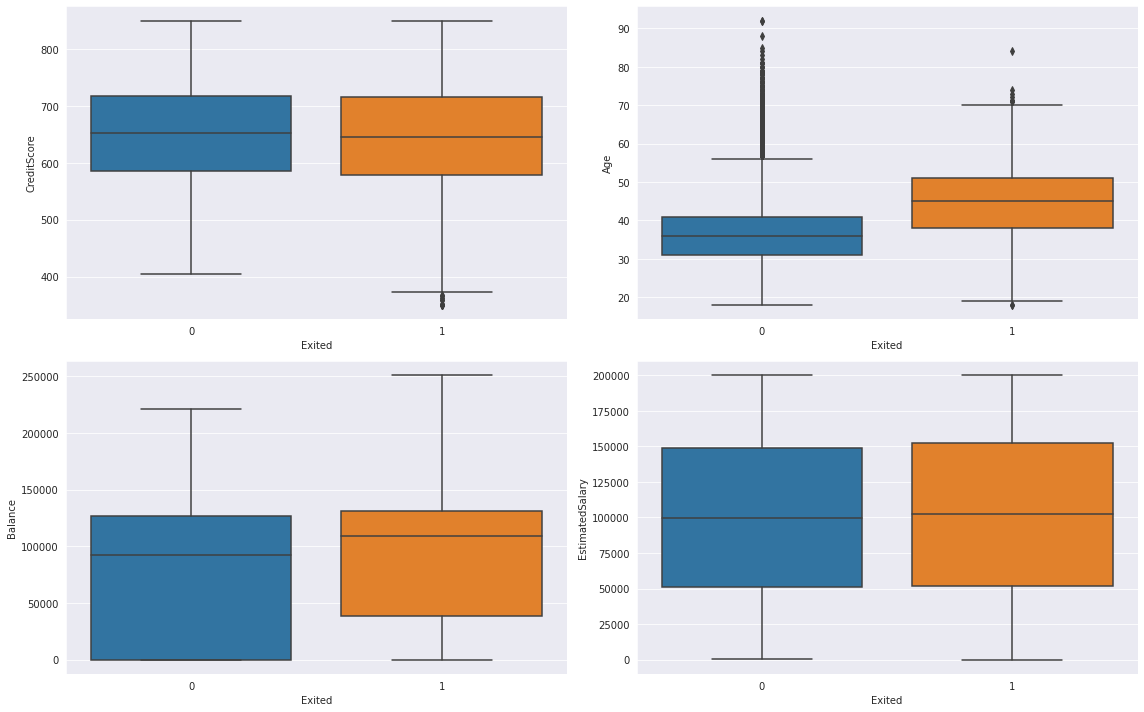

In [12]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

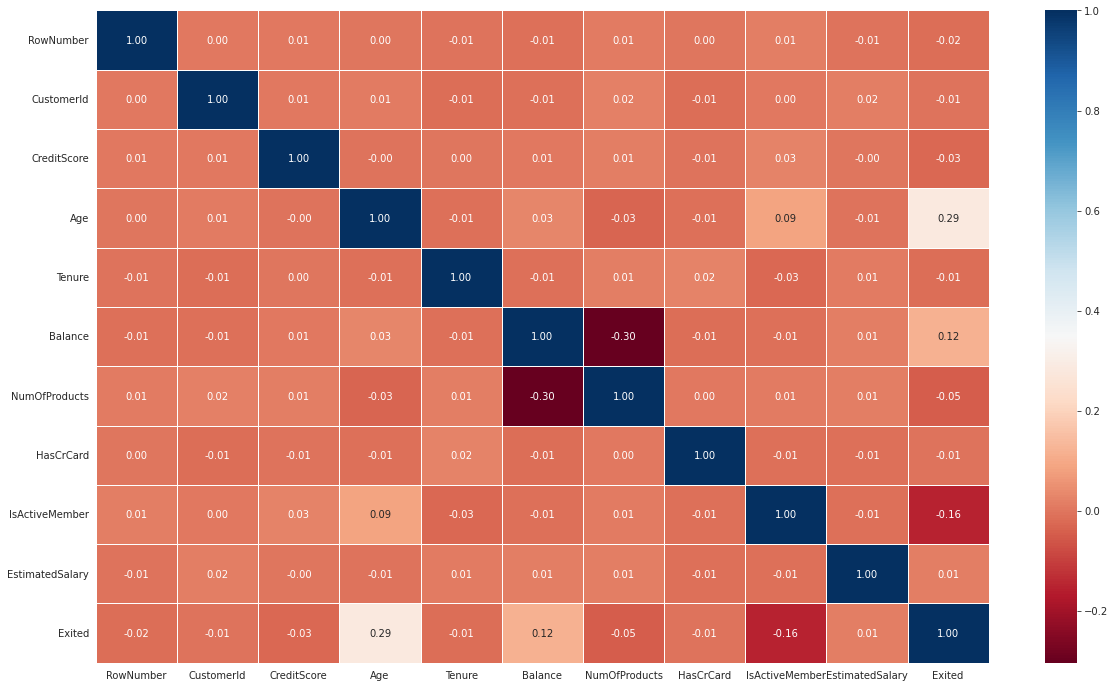

In [16]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, cmap = "RdBu", linewidths = 1, annot = True, fmt = ".2f")
plt.show()

We can say that there is no multicolinearity present in data

In [17]:
# dropping useless columns 

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
# Encoding categorical variables

df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# creating features and label 

from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [22]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [23]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

2022-11-18 13:28:30.012386: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-18 13:28:30.212860: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
188/188 [==============================] - 2s 4ms/step - loss: 0.6226 - accuracy: 0.6643 - val_loss: 0.5766 - val_accuracy: 0.7933
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7990 - val_loss: 0.4606 - val_accuracy: 0.7933
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8425 - val_loss: 0.3794 - val_accuracy: 0.8447
Epoch 4/100
188/188 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.8433 - val_loss: 0.3597 - val_accuracy: 0.8527
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8460 - val_loss: 0.3630 - val_accuracy: 0.8560
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8445 - val_loss: 0.3542 - val_accuracy: 0.8600
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3729 - accuracy: 0.8498 - val_loss: 0.3539 - val_accuracy: 0.8560

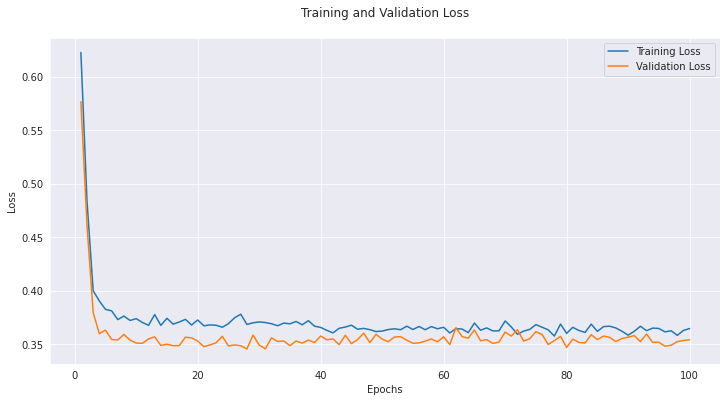

In [25]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

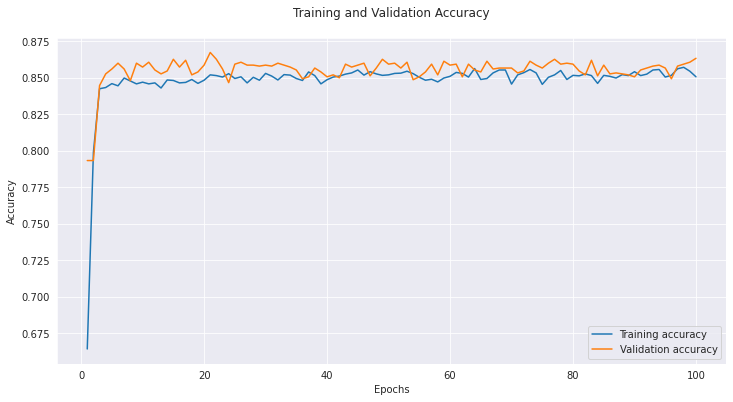

In [26]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

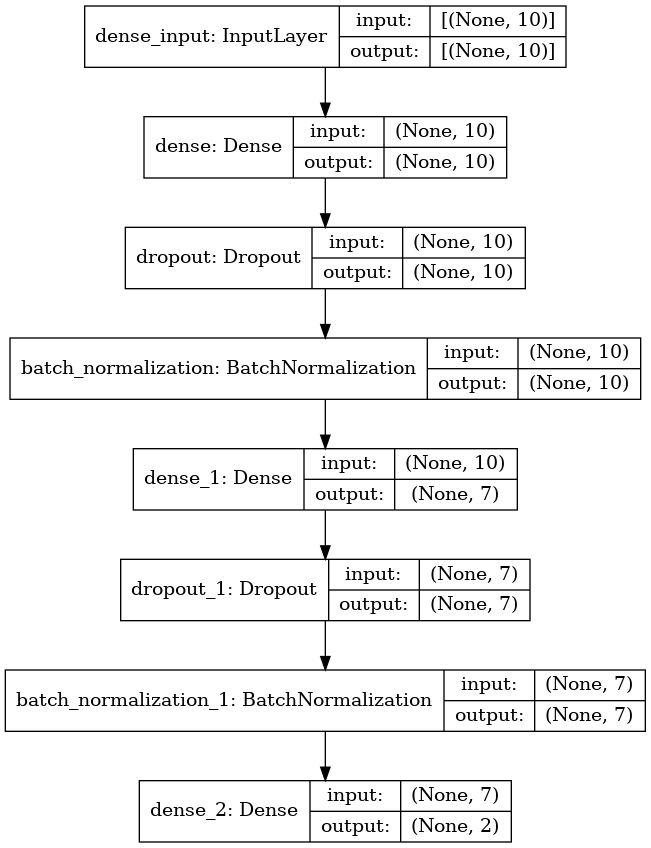

In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)